# RAISIN CLASSIFICATION USING SVM

In [1]:
from IPython.display import Image


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
import warnings
from IPython.display import Image
import ipywidgets as widgets


In [3]:
df = pd.read_excel(r"C:\Users\anike\Downloads\Rasin dataset\Raisin_Dataset.xlsx")


In [4]:
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524.0,442.246011,253.291155,0.819738,90546.0,0.758651,1184.040,Kecimen
1,75166.0,406.690687,243.032436,0.801805,78789.0,0.684130,1121.786,Kecimen
2,90856.0,442.267048,266.328318,0.798354,93717.0,0.637613,1208.575,Kecimen
3,45928.0,286.540559,208.760042,0.684989,47336.0,0.699599,844.162,Kecimen
4,79408.0,352.190770,290.827533,0.564011,81463.0,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248.0,430.077308,247.838695,0.817263,85839.0,0.668793,1129.072,Besni
896,87350.0,440.735698,259.293149,0.808629,90899.0,0.636476,1214.252,Besni
897,99657.0,431.706981,298.837323,0.721684,106264.0,0.741099,1292.828,Besni
898,93523.0,476.344094,254.176054,0.845739,97653.0,0.658798,1258.548,Besni


In [5]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524.0,442.246011,253.291155,0.819738,90546.0,0.758651,1184.040,Kecimen
1,75166.0,406.690687,243.032436,0.801805,78789.0,0.684130,1121.786,Kecimen
2,90856.0,442.267048,266.328318,0.798354,93717.0,0.637613,1208.575,Kecimen
3,45928.0,286.540559,208.760042,0.684989,47336.0,0.699599,844.162,Kecimen
4,79408.0,352.190770,290.827533,0.564011,81463.0,0.792772,1073.251,Kecimen


In [6]:
df.tail()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
895,83248.0,430.077308,247.838695,0.817263,85839.0,0.668793,1129.072,Besni
896,87350.0,440.735698,259.293149,0.808629,90899.0,0.636476,1214.252,Besni
897,99657.0,431.706981,298.837323,0.721684,106264.0,0.741099,1292.828,Besni
898,93523.0,476.344094,254.176054,0.845739,97653.0,0.658798,1258.548,Besni
899,85609.0,512.081774,215.271976,0.907345,89197.0,0.632020,1272.862,Besni


In [7]:
df.isnull().sum()

Area               12
MajorAxisLength     0
MinorAxisLength     0
Eccentricity        0
ConvexArea         12
Extent              0
Perimeter           0
Class               0
dtype: int64

In [8]:
df.isnull().sum()

Area               12
MajorAxisLength     0
MinorAxisLength     0
Eccentricity        0
ConvexArea         12
Extent              0
Perimeter           0
Class               0
dtype: int64

# FILLING NULL VALUES

In [9]:
df['Area'].fillna(1.0,inplace = True)
df['ConvexArea'].fillna(1.0,inplace = True)


In [10]:
df.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

<Axes: >

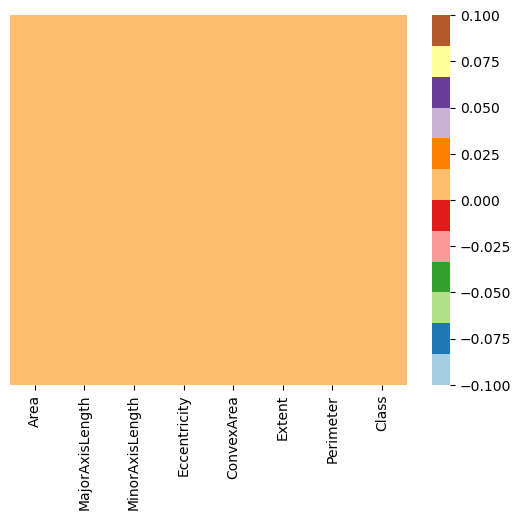

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="Paired") 

# PERFORMING EDA 

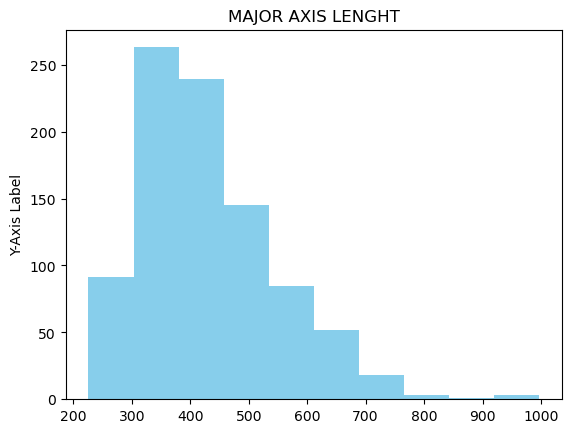

In [12]:
plt.hist(df['MajorAxisLength'], bins=10, color='skyblue')
 
plt.xlabel('')
plt.ylabel('Y-Axis Label')
plt.title('MAJOR AXIS LENGHT')
plt.show()


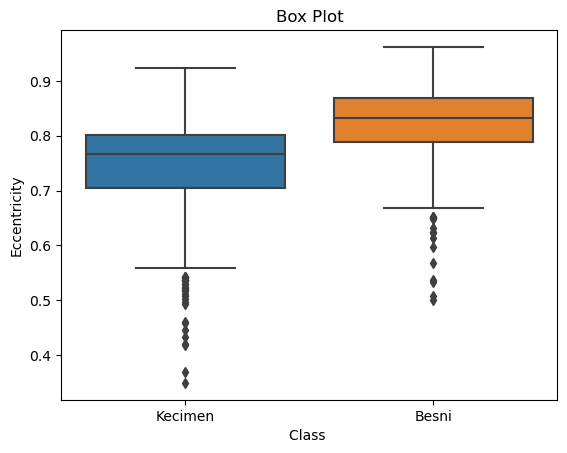

In [13]:
sns.boxplot(x='Class', y='Eccentricity', data=df)
plt.xlabel('Class ')
plt.ylabel('Eccentricity')
plt.title('Box Plot')
plt.show()


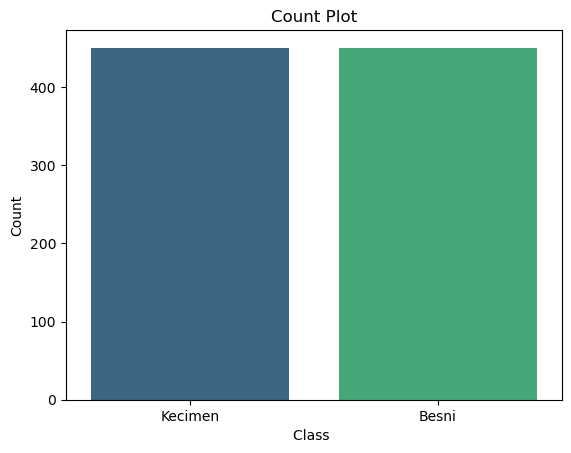

In [14]:
sns.countplot(x='Class', data=df, palette='viridis')
plt.xlabel('Class ')
plt.ylabel('Count')
plt.title('Count Plot')

plt.show()


In [15]:
df_area=df['Area'].value_counts()

In [16]:
df_area

1.0         12
87524.0      1
101439.0     1
109791.0     1
89236.0      1
            ..
44007.0      1
65062.0      1
38724.0      1
63514.0      1
85609.0      1
Name: Area, Length: 889, dtype: int64

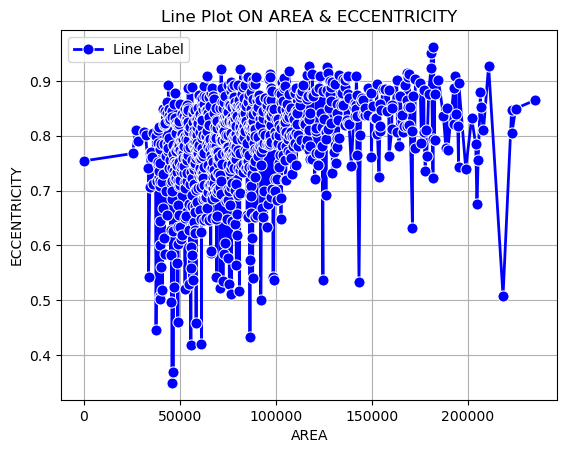

In [17]:
sns.lineplot(x='Area', y='Eccentricity', data=df, marker='o', color='b', linewidth=2, markersize=8, label='Line Label')

plt.xlabel('AREA')
plt.ylabel('ECCENTRICITY')
plt.title('Line Plot ON AREA & ECCENTRICITY')
plt.legend()  
plt.grid(True)  
plt.show()

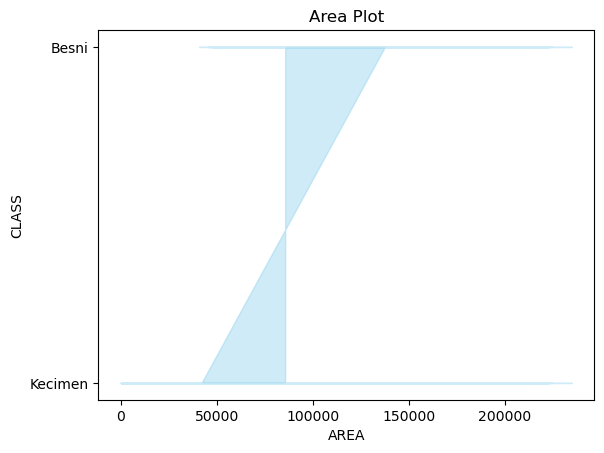

In [18]:
plt.fill_between(df['Area'], df['Class'], color='skyblue', alpha=0.4)
plt.xlabel('AREA')
plt.ylabel('CLASS')
plt.title('Area Plot')
plt.show()


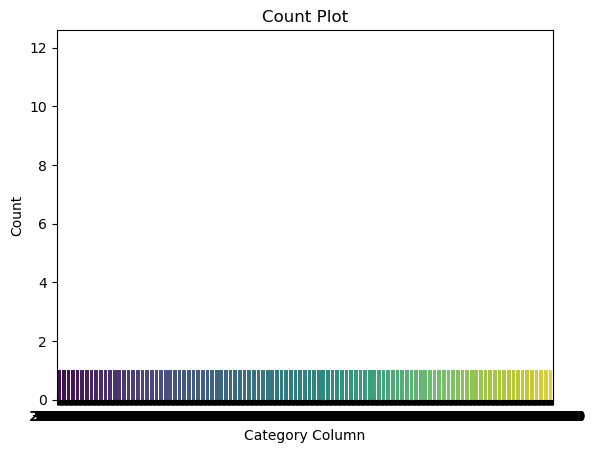

In [19]:
sns.countplot(x='ConvexArea', data=df, palette='viridis')
plt.xlabel('Category Column')
plt.ylabel('Count')
plt.title('Count Plot')
plt.show()


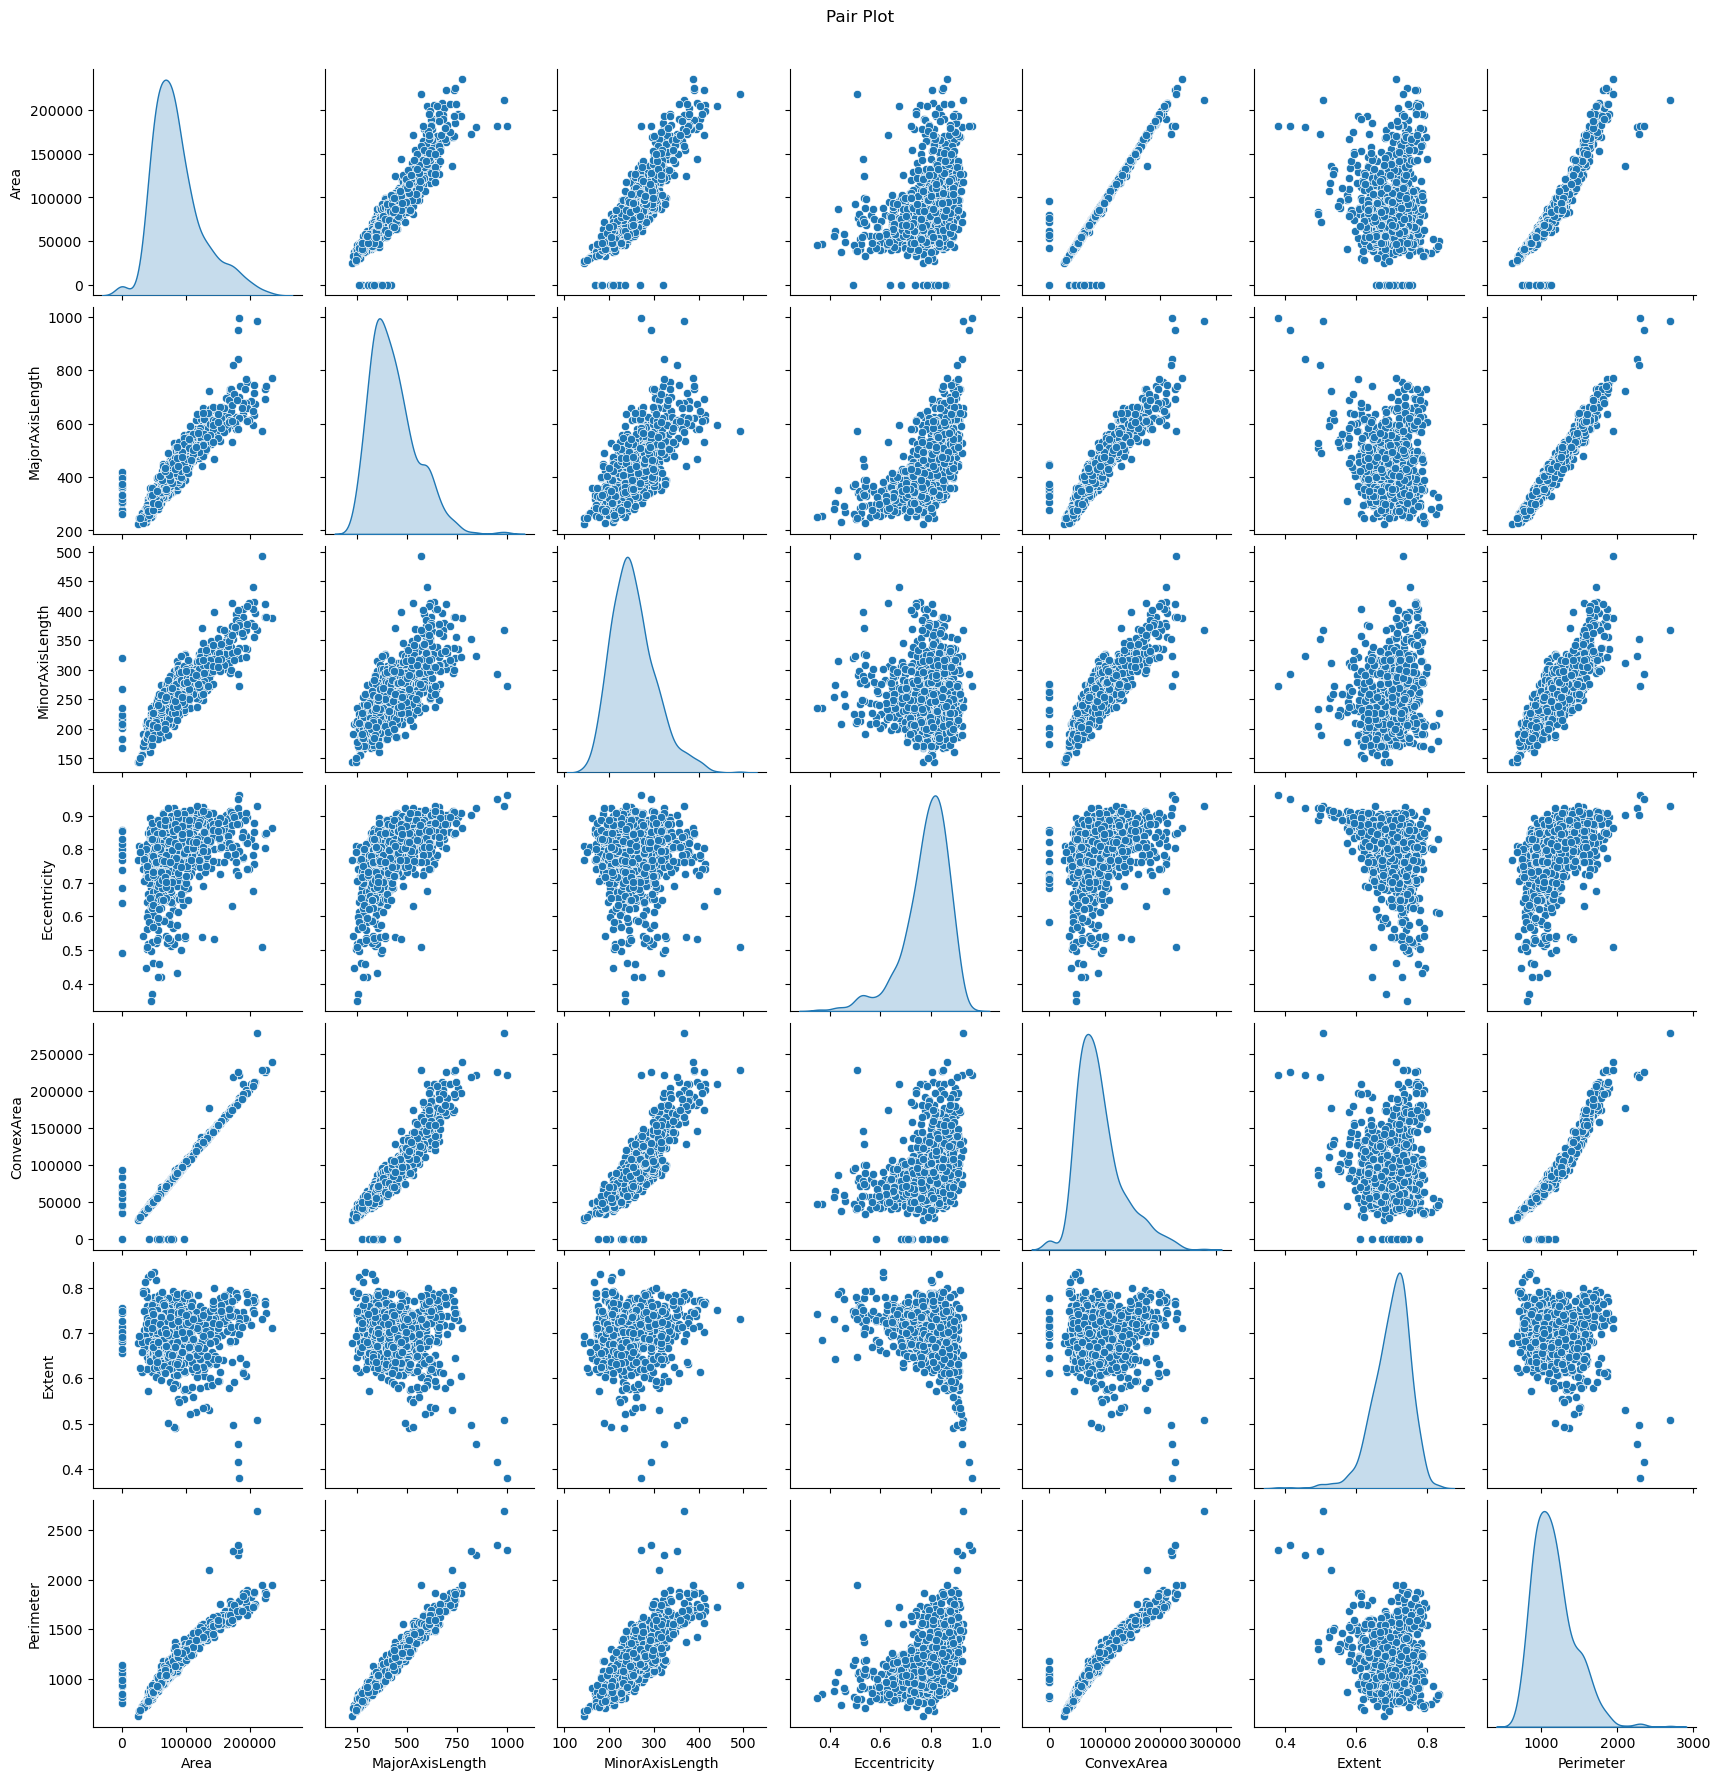

In [20]:
sns.pairplot(df, diag_kind='kde')
plt.suptitle('Pair Plot', y=1.02)
plt.show()


C:\Users\anike\AppData\Local\Temp\ipykernel_17116\4110412429.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


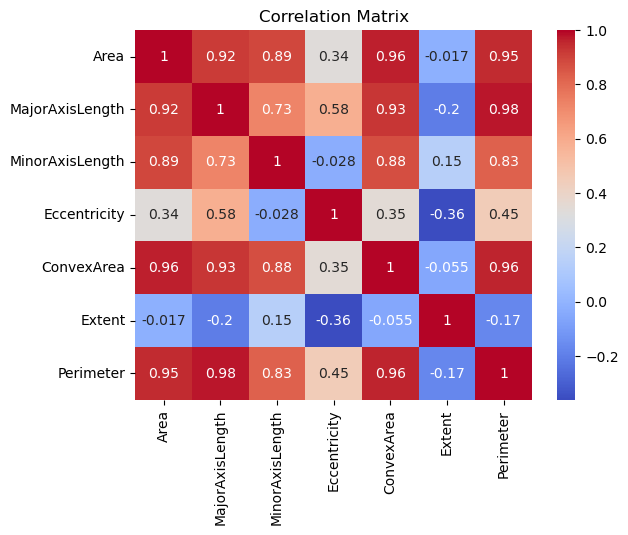

In [21]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [22]:
df_pie =df['Class'].value_counts()

In [23]:
df_pie

Kecimen    450
Besni      450
Name: Class, dtype: int64

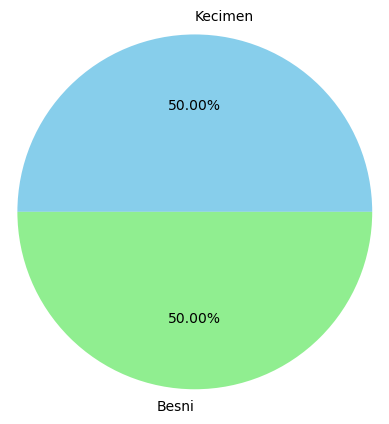

In [24]:

plt.pie(df_pie,labels=df_pie.index,autopct="%.2f%%",radius =1.2,colors=['skyblue', 'lightgreen'])

plt.show()

<Axes: >

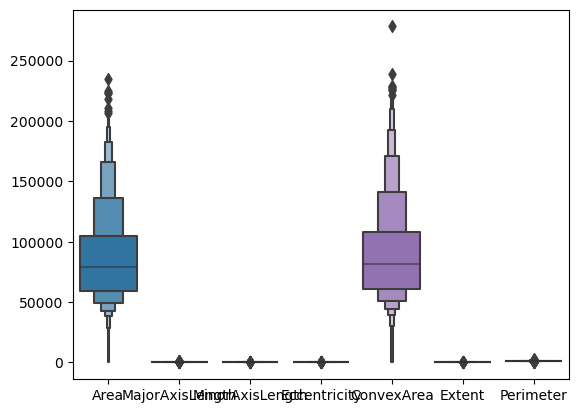

In [26]:
sns.boxenplot(df)

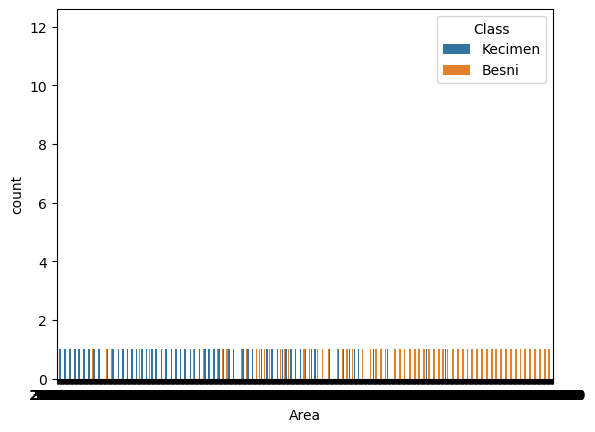

In [27]:
sns.countplot(x=df['Area'],hue=df['Class'])
plt.show()

<Axes: >

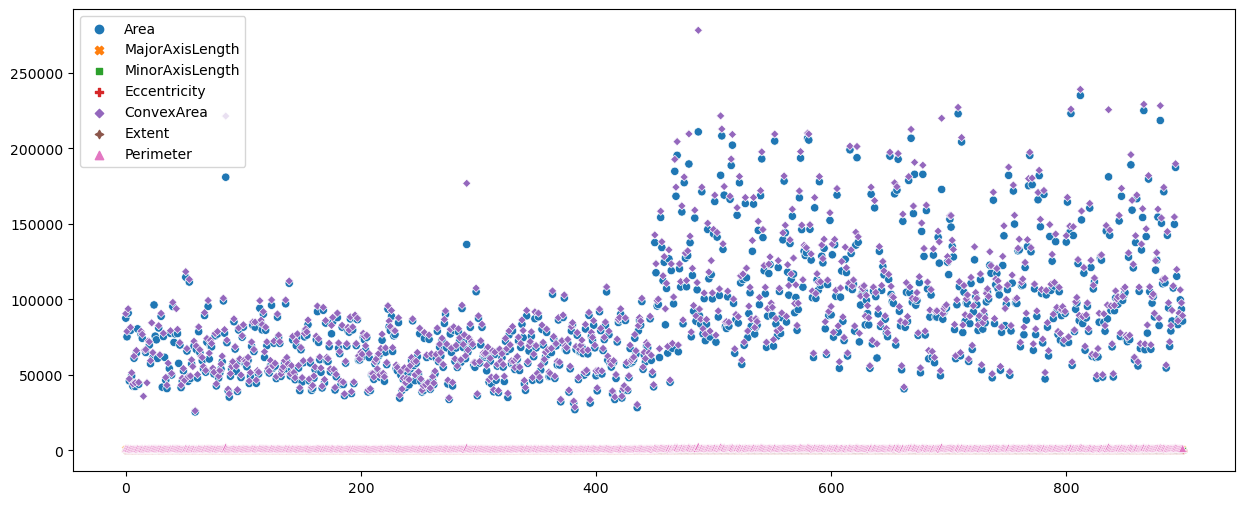

In [28]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
sns.scatterplot(df)

<Axes: xlabel='Class', ylabel='MinorAxisLength'>

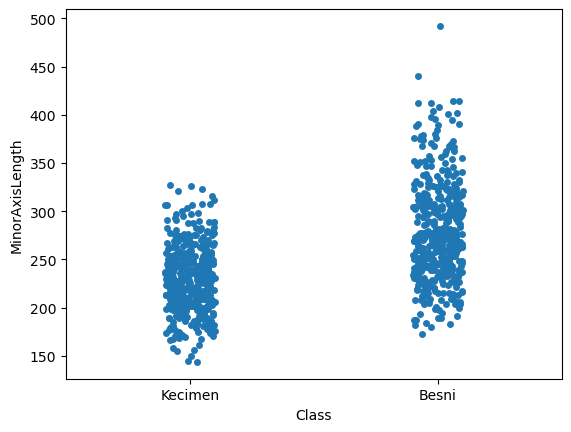

In [29]:
sns.stripplot(x='Class',y='MinorAxisLength',data=df)

<Axes: xlabel='Area', ylabel='Class'>

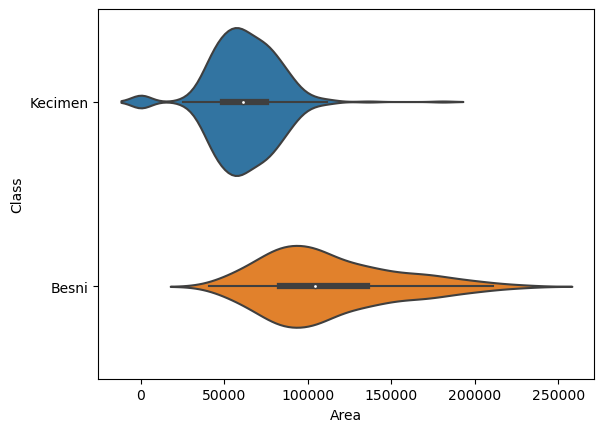

In [30]:
sns.violinplot(x='Area',y='Class',data=df)

In [31]:
cat_data=df.select_dtypes(include=object)
num_data=df.select_dtypes(exclude=object)

In [32]:
num_data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,87524.0,442.246011,253.291155,0.819738,90546.0,0.758651,1184.040
1,75166.0,406.690687,243.032436,0.801805,78789.0,0.684130,1121.786
2,90856.0,442.267048,266.328318,0.798354,93717.0,0.637613,1208.575
3,45928.0,286.540559,208.760042,0.684989,47336.0,0.699599,844.162
4,79408.0,352.190770,290.827533,0.564011,81463.0,0.792772,1073.251
...,...,...,...,...,...,...,...
895,83248.0,430.077308,247.838695,0.817263,85839.0,0.668793,1129.072
896,87350.0,440.735698,259.293149,0.808629,90899.0,0.636476,1214.252
897,99657.0,431.706981,298.837323,0.721684,106264.0,0.741099,1292.828
898,93523.0,476.344094,254.176054,0.845739,97653.0,0.658798,1258.548


In [33]:
cat_data

,Class
0,Kecimen
1,Kecimen
2,Kecimen
3,Kecimen
4,Kecimen
...,...
895,Besni
896,Besni
897,Besni
898,Besni


# CHECKING OUTLIERS IN COLUMNS USING BOXPLOT

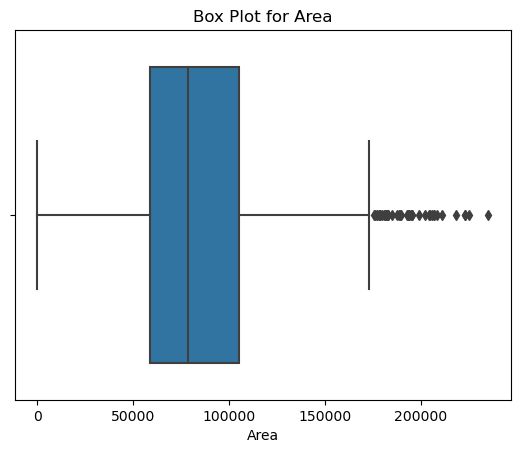

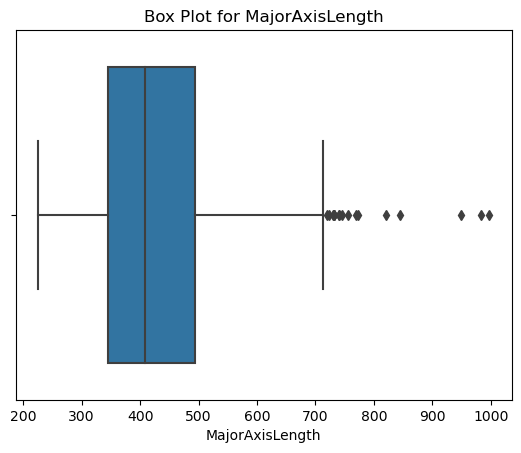

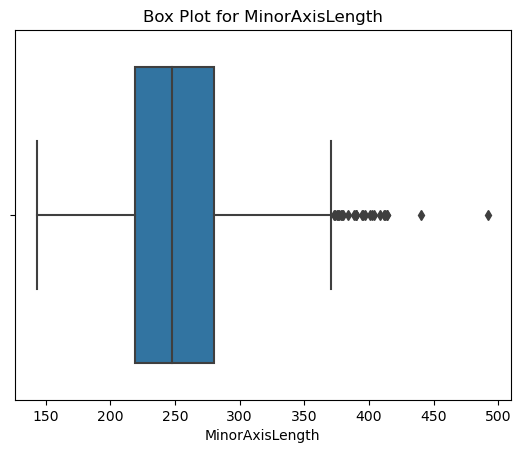

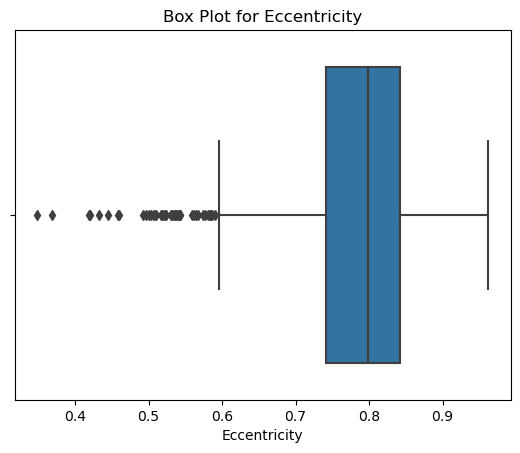

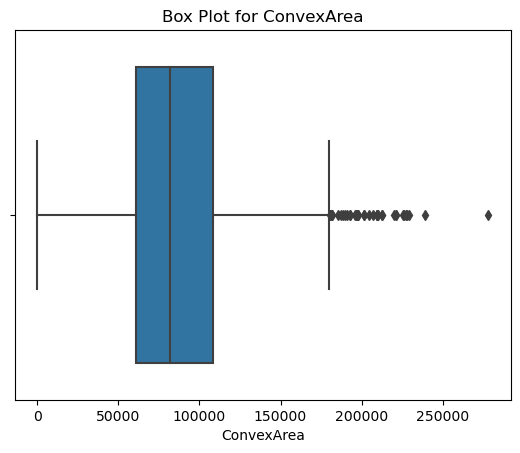

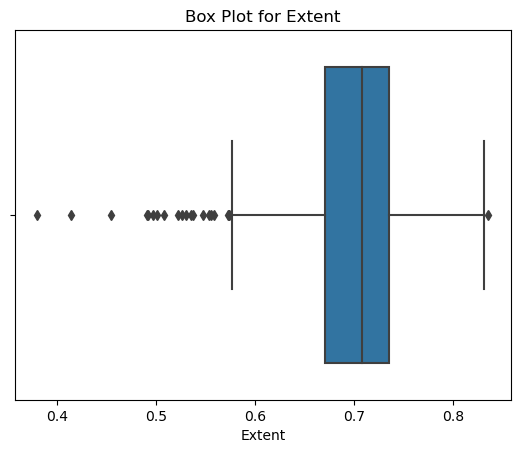

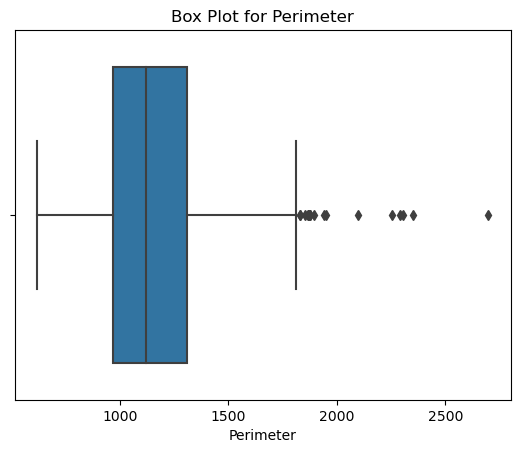

In [34]:
for i in num_data:
    sns.boxplot(x=df[i])
    plt.title(f'Box Plot for {i}')
    plt.show()


In [35]:
df.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

# REMOVING OUTLIERS FROM COLUMNS USING Z SCORE METHOD

In [36]:
from scipy import stats
z_scores=stats.zscore(df['Area'])
z_score_outliers=(z_scores<-3)|(z_scores>3)
z_score_outlier_rows=df[z_score_outliers]
print("outliers detected by Z-score:",z_score_outlier_rows)

outliers detected by Z-score:          Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
487  210923.0       984.045491       367.279532      0.927737    278217.0   
507  208264.0       675.098345       395.579291      0.810341    212813.0   
708  222915.0       731.559406       389.946700      0.846093    227170.0   
804  223075.0       694.247550       411.810369      0.805073    225916.0   
812  235047.0       772.956877       388.201507      0.864735    239093.0   
866  225043.0       740.003743       390.300858      0.849598    229195.0   
880  218459.0       571.289203       492.275279      0.507432    228259.0   

       Extent  Perimeter  Class  
487  0.507352   2697.753  Besni  
507  0.771748   1755.167  Besni  
708  0.770543   1876.307  Besni  
804  0.764940   1812.569  Besni  
812  0.711673   1942.050  Besni  
866  0.744187   1853.893  Besni  
880  0.731974   1947.460  Besni  


In [37]:
x=(z_scores>-3)&(z_scores<3)
df1_new=df[x]

In [38]:
z_scores=stats.zscore(df['MajorAxisLength'])
z_score_outliers=(z_scores<-3)|(z_scores>3)
z_score_outlier_rows=df[z_score_outliers]
print("outliers detected by Z-score:",z_score_outlier_rows)

outliers detected by Z-score:          Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
85   180898.0       843.956653       323.190569      0.923770    221396.0   
487  210923.0       984.045491       367.279532      0.927737    278217.0   
506  182160.0       997.291941       271.872395      0.962124    221527.0   
694  172783.0       820.724022       352.193680      0.903245    219952.0   
836  181126.0       949.662672       293.386698      0.951082    225592.0   

       Extent  Perimeter    Class  
85   0.454189   2253.557  Kecimen  
487  0.507352   2697.753    Besni  
506  0.379856   2303.690    Besni  
694  0.496937   2289.889    Besni  
836  0.414154   2352.029    Besni  


In [39]:
x=(z_scores>-3)&(z_scores<3)
df1_new=df[x]

In [129]:
z_scores=stats.zscore(df1_new['MinorAxisLength'])
z_score_outliers=(z_scores<-3)|(z_scores>3)
z_score_outlier_rows=df1_new[z_score_outliers]
print("outliers detected by Z-score:",z_score_outlier_rows)

outliers detected by Z-score:          Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
479  189637.0       636.752437       403.719328      0.773310    209580.0   
490  171256.0       531.373205       412.382817      0.630647    174277.0   
552  204864.0       596.639802       440.497127      0.674476    209457.0   
581  205497.0       632.727607       414.188326      0.755969    209486.0   
616  199015.0       615.417236       413.927473      0.740009    201464.0   
769  195281.0       609.829726       408.535619      0.742436    197426.0   
804  223075.0       694.247550       411.810369      0.805073    225916.0   
880  218459.0       571.289203       492.275279      0.507432    228259.0   

       Extent  Perimeter  Class  
479  0.613785   1870.280  Besni  
490  0.701915   1559.214  Besni  
552  0.751009   1726.246  Besni  
581  0.769289   1736.839  Besni  
616  0.768570   1687.866  Besni  
769  0.769656   1639.103  Besni  
804  0.764940   1812.569  Besni  
880 

In [41]:
x=(z_scores>-3)&(z_scores<3)
df1_new=df[x]

In [143]:
z_scores=stats.zscore(df['Eccentricity'])
z_score_outliers=(z_scores<-3)|(z_scores>3)
z_score_outlier_rows=df[z_score_outliers]
print("outliers detected by Z-score:",z_score_outlier_rows)

outliers detected by Z-score:          Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
13    76792.0       338.857545       291.359202      0.510584     78842.0   
23    61251.0       301.507790       273.659941      0.419754     64732.0   
34    46427.0       253.842028       235.906824      0.369212     48275.0   
43        1.0       368.406214       320.714579      0.492087     93772.0   
106   48945.0       269.370411       239.162166      0.460121     51456.0   
156   45962.0       251.133384       235.368076      0.348730     47173.0   
192   37569.0       232.427848       208.152006      0.444950     38874.0   
197   86545.0       350.127874       315.719520      0.432307     87512.0   
235   39716.0       243.038280       210.114057      0.502580     40598.0   
251   45598.0       259.896265       225.656220      0.496118     47266.0   
253   39439.0       246.763611       212.635393      0.507424     42795.0   
316   55746.0       280.313124       254.60033

In [144]:
x=(z_scores>-3)&(z_scores<3)
df1_new=df[x]

In [147]:
z_scores=stats.zscore(df['ConvexArea'])
z_score_outliers=(z_scores<-3)|(z_scores>3)
z_score_outlier_rows=df[z_score_outliers]
print("outliers detected by Z-score:",z_score_outlier_rows)

outliers detected by Z-score:          Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
85   180898.0       843.956653       323.190569      0.923770    221396.0   
487  210923.0       984.045491       367.279532      0.927737    278217.0   
506  182160.0       997.291941       271.872395      0.962124    221527.0   
694  172783.0       820.724022       352.193680      0.903245    219952.0   
708  222915.0       731.559406       389.946700      0.846093    227170.0   
804  223075.0       694.247550       411.810369      0.805073    225916.0   
812  235047.0       772.956877       388.201507      0.864735    239093.0   
836  181126.0       949.662672       293.386698      0.951082    225592.0   
866  225043.0       740.003743       390.300858      0.849598    229195.0   
880  218459.0       571.289203       492.275279      0.507432    228259.0   

       Extent  Perimeter  Class  
85   0.454189   2253.557      1  
487  0.507352   2697.753      0  
506  0.379856   2303

In [148]:
x=(z_scores>-3)&(z_scores<3)
df1_new=df[x]

In [46]:
z_scores=stats.zscore(df['Extent'])
z_score_outliers=(z_scores<-3)|(z_scores>3)
z_score_outlier_rows=df[z_score_outliers]
print("outliers detected by Z-score:",z_score_outlier_rows)

outliers detected by Z-score:          Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
85   180898.0       843.956653       323.190569      0.923770    221396.0   
290  136340.0       722.853917       311.341355      0.902490    176818.0   
459   83107.0       507.380899       233.153850      0.888165     93706.0   
487  210923.0       984.045491       367.279532      0.927737    278217.0   
498  116406.0       612.665318       251.832827      0.911615    125638.0   
506  182160.0       997.291941       271.872395      0.962124    221527.0   
536   81604.0       528.585892       204.739513      0.921939     87172.0   
579  130868.0       613.172615       273.181915      0.895271    134139.0   
682  106923.0       591.115838       234.823346      0.917709    111428.0   
694  172783.0       820.724022       352.193680      0.903245    219952.0   
802   71502.0       490.433479       189.442940      0.922383     75157.0   
829  127292.0       639.850635       258.38194

In [47]:
x=(z_scores>-3)&(z_scores<3)
df1_new=df[x]

In [48]:
z_scores=stats.zscore(df['Perimeter'])
z_score_outliers=(z_scores<-3)|(z_scores>3)
z_score_outlier_rows=df[z_score_outliers]
print("outliers detected by Z-score:",z_score_outlier_rows)

outliers detected by Z-score:          Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
85   180898.0       843.956653       323.190569      0.923770    221396.0   
290  136340.0       722.853917       311.341355      0.902490    176818.0   
487  210923.0       984.045491       367.279532      0.927737    278217.0   
506  182160.0       997.291941       271.872395      0.962124    221527.0   
694  172783.0       820.724022       352.193680      0.903245    219952.0   
836  181126.0       949.662672       293.386698      0.951082    225592.0   

       Extent  Perimeter    Class  
85   0.454189   2253.557  Kecimen  
290  0.529774   2098.263  Kecimen  
487  0.507352   2697.753    Besni  
506  0.379856   2303.690    Besni  
694  0.496937   2289.889    Besni  
836  0.414154   2352.029    Besni  


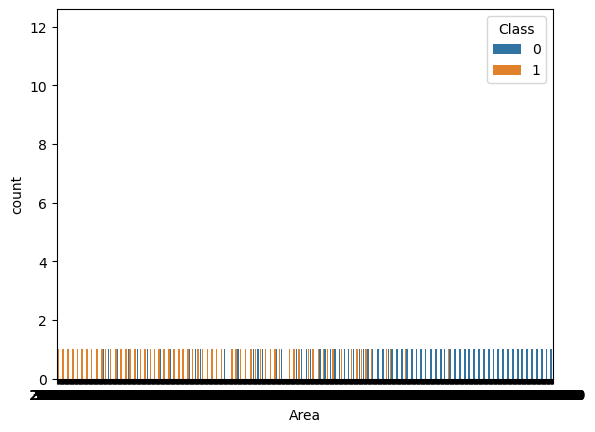

In [149]:
sns.countplot(x=df['Area'],hue=df['Class'])
plt.show()

In [49]:
x=(z_scores>-3)&(z_scores<3)
df1_new=df[x]

In [51]:
df1_new

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524.0,442.246011,253.291155,0.819738,90546.0,0.758651,1184.040,Kecimen
1,75166.0,406.690687,243.032436,0.801805,78789.0,0.684130,1121.786,Kecimen
2,90856.0,442.267048,266.328318,0.798354,93717.0,0.637613,1208.575,Kecimen
3,45928.0,286.540559,208.760042,0.684989,47336.0,0.699599,844.162,Kecimen
4,79408.0,352.190770,290.827533,0.564011,81463.0,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248.0,430.077308,247.838695,0.817263,85839.0,0.668793,1129.072,Besni
896,87350.0,440.735698,259.293149,0.808629,90899.0,0.636476,1214.252,Besni
897,99657.0,431.706981,298.837323,0.721684,106264.0,0.741099,1292.828,Besni
898,93523.0,476.344094,254.176054,0.845739,97653.0,0.658798,1258.548,Besni


In [51]:
df['Class'].unique()

array(['Kecimen', 'Besni'], dtype=object)

In [61]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler


In [62]:
df.replace({'Class':{'Kecimen':1,'Besni':0}},inplace=True)

# ONEHOTENCODING AND STANDARDSCALER

In [63]:
numerical_col = ['Area','MajorAxisLength','MinorAxisLength','Eccentricity','ConvexArea','Extent','Perimeter']
Scaled = StandardScaler()
Scaled= pd.DataFrame(Scaled.fit_transform(df[numerical_col]),columns=numerical_col)

# SPLITING COLUMNS IN X AND Y

In [65]:
x= Scaled
y = df['Class']

In [66]:
x

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,0.012531,0.097577,-0.023958,0.423142,0.006418,1.106743,0.066274
1,-0.295764,-0.209012,-0.229292,0.224476,-0.273815,-0.287777,-0.161252
2,0.095655,0.097758,0.236988,0.186239,0.082000,-1.158250,0.155945
3,-1.025166,-1.245051,-0.915273,-1.069623,-1.023511,0.001711,-1.175915
4,-0.189939,-0.678958,0.727354,-2.409827,-0.210079,1.745259,-0.338639
...,...,...,...,...,...,...,...
895,-0.094142,-0.007352,-0.133092,0.395714,-0.105775,-0.574773,-0.134624
896,0.008191,0.084554,0.096175,0.300071,0.014832,-1.179518,0.176693
897,0.315214,0.006700,0.887674,-0.663114,0.381063,0.778289,0.463873
898,0.162189,0.391600,-0.006246,0.711173,0.175816,-0.761804,0.338586


In [67]:
y

0      1
1      1
2      1
3      1
4      1
      ..
895    0
896    0
897    0
898    0
899    0
Name: Class, Length: 900, dtype: int64

# TRAINING AND TESTING THE DATA

In [68]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [69]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
import warnings
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [70]:
scaler = StandardScaler()

In [71]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [72]:
svcm = SVC(kernel='linear')

In [73]:
svcm.fit(x_train,y_train)

SVC(kernel='linear')

In [74]:
y_pred = svcm.predict(x_test)

In [75]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1], dtype=int64)

In [76]:
acc = accuracy_score(y_test,y_pred)
print('Accuracy:{:.2f}%'. format(acc*100))

Accuracy:86.11%


In [77]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        86
           1       0.89      0.84      0.86        94

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180



In [78]:
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:')
print(cm)

confusion matrix:
[[76 10]
 [15 79]]


<Axes: >

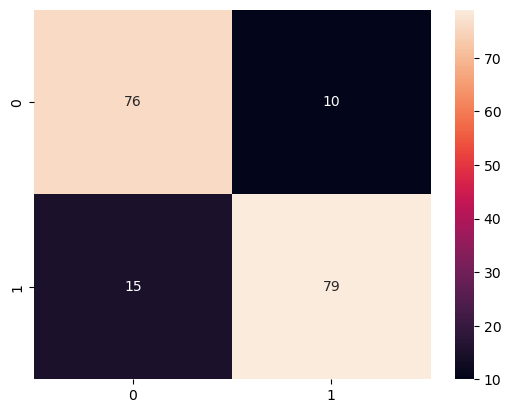

In [79]:
sns.heatmap(cm,annot=True)

In [80]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [99]:
yb = label_binarize(y,classes=[0,1])

In [100]:
nc = yb.shape[1]

In [101]:
classifier = OneVsRestClassifier(SVC(kernel='linear',probability=True,random_state=42))

In [102]:
y_score = classifier.fit(x_train,y_train).decision_function(x_test)

In [103]:
y_score_2d = y_score.reshape(-1, 1)


In [104]:
fpr, tpr, _ = roc_curve(y_test, y_score)


In [105]:
roc_auc = auc(fpr, tpr)


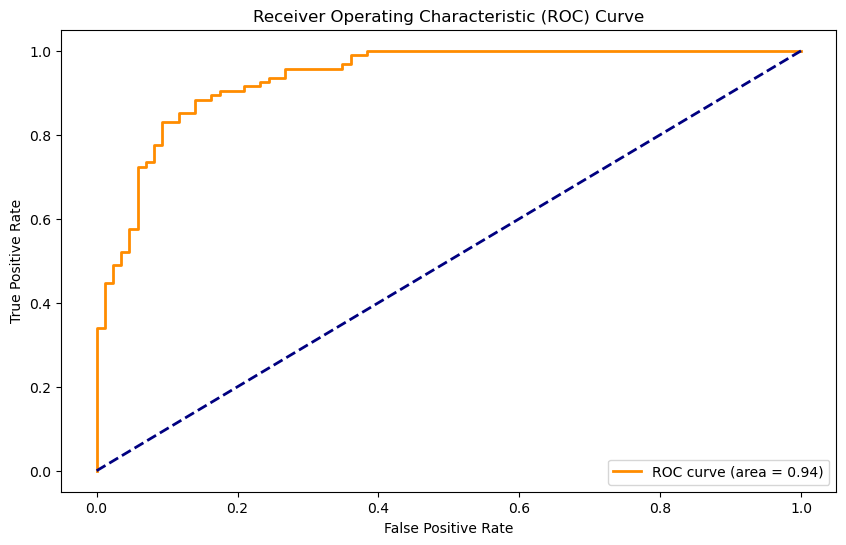

['',
 'from IPython.display import Image',
 'import numpy as np\nimport pandas as pd\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.metrics import mean_squared_error\nfrom sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler\nimport warnings\nfrom IPython.display import Image\nimport ipywidgets as widgets',
 'df = pd.read_excel(r"C:\\Users\\anike\\Downloads\\Rasin dataset\\Raisin_Dataset.xlsx")',
 'df',
 'df.head()',
 'df.tail()',
 'df.isnull().sum()',
 'df.isnull().sum()',
 "df['Area'].fillna(1.0,inplace = True)\ndf['ConvexArea'].fillna(1.0,inplace = True)",
 'df.isnull().sum()',
 'sns.heatmap(df.isnull(),yticklabels=False,cmap="Paired") ',
 "plt.hist(df['MajorAxisLength'], bins=10, color='skyblue')\n \nplt.xlabel('')\nplt.ylabel('Y-Axis Label')\nplt.title('MAJOR AXIS LENGHT')\nplt.show()",
 "sns.boxplot(x='Class', y='Eccentricity', data=df)

In [106]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
In 

In [107]:
from sklearn.metrics import confusion_matrix

In [108]:
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:')
print(cm)

confusion matrix:
[[76 10]
 [15 79]]


# TUNNING FOR SVM MODEL  BY USING GRIDSERACH AND RANDOMSEARCH 

# GRIDSEARCH CV

In [109]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid = {
 'C': [0.1, 1, 10, 100],
 'kernel': ['linear'],
}
svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)
print("Best hyperparameters found: ", grid_search.best_params_)
print("Best accuracy on the validation set: {:.2f}".format(grid_search.best_score_))

Best hyperparameters found:  {'C': 10, 'kernel': 'linear'}
Best accuracy on the validation set: 0.88


In [110]:
grid_search = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['linear']})

In [111]:
print("Best hyperparameters found: ", grid_search.best_params_)
print("Best accuracy on the validation set: {:.2f}".format(grid_search.best_score_))

Best hyperparameters found:  {'C': 10, 'kernel': 'linear'}
Best accuracy on the validation set: 0.88


In [112]:
best_svm = grid_search.best_estimator_
best_svm.fit(x_train, y_train)

SVC(C=10, kernel='linear')

In [113]:
test_accuracy = best_svm.score(x_test, y_test)
print("Test accuracy: {:.2f}".format(test_accuracy))

Test accuracy: 0.86


In [114]:
test_accuracy = best_svm.score(x_train, y_train)
print("Test accuracy: {:.2f}".format(test_accuracy))

Test accuracy: 0.88


# RANDOMSEARCH CV

In [115]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [116]:
svm=SVC(kernel='linear')
param_dist={
    'C':uniform(loc=0,scale=10),
    'gamma':['scale','auto']+list(uniform(loc=0,scale=1).rvs(10)),
}

In [117]:
n_iter_search=20
random_search = RandomizedSearchCV(svcm, param_distributions=param_dist, n_iter=n_iter_search, cv=5, n_jobs=-1, random_state=42)
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=SVC(kernel='linear'), n_iter=20, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001FEACC03D10>,
                                        'gamma': ['scale', 'auto',
                                                  0.9922694024268763,
                                                  0.5651547588977448,
                                                  0.5793759285459769,
                                                  0.1605478149155226,
                                                  0.6110156651731783,
                                                  0.9290907705770062,
                                                  0.531399944344966,
                                                  0.3922417213648476,
                                                  0.42080063617907393,
                                                  0.0585352629854653]},
                   random_state=42)

In [118]:
best_param = random_search.best_params_
best_model = random_search.best_estimator_
y_pred_2=best_model.predict(x_test)

In [119]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        86
           1       0.89      0.84      0.86        94

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180



In [120]:
cm= confusion_matrix(y_test,y_pred_2)
print(cm)

[[76 10]
 [16 78]]


#  PERFORMING NAIVE BAYES

In [121]:
 from sklearn import model_selection, naive_bayes, svm, metrics,feature_extraction

In [122]:
x= Scaled
y = df['Class']

In [123]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [124]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [125]:
bayes = naive_bayes.MultinomialNB()

In [126]:
bayes.fit(x_train,y_train)

MultinomialNB()

In [127]:
y_pred_nb=bayes.predict(x_test)

In [104]:
accuracy=metrics.accuracy_score(y_test,y_pred_nb)
accuracy

0.8555555555555555

In [105]:
 print(metrics.classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        86
           1       0.87      0.85      0.86        94

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180



In [106]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[76, 10],
       [15, 79]], dtype=int64)

In [107]:
yb=label_binarize(y, classes=[0,1,2])
nc = yb.shape[1] 

In [108]:
classifier = OneVsRestClassifier(bayes)

In [1]:
y_score=classifier.fit(x_train,y_train).predict(x_test)

NameError: name 'classifier' is not defined

In [110]:
fpr=dict()
tpr=dict()
roc_auc=dict()

for i in range (nc):
    fpr[i],tpr[i],_=roc_curve(y_test == i, y_score)
    roc_auc[i]=auc(fpr[i],tpr[i])

C:\Users\anike\anaconda3\anaconda\Lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


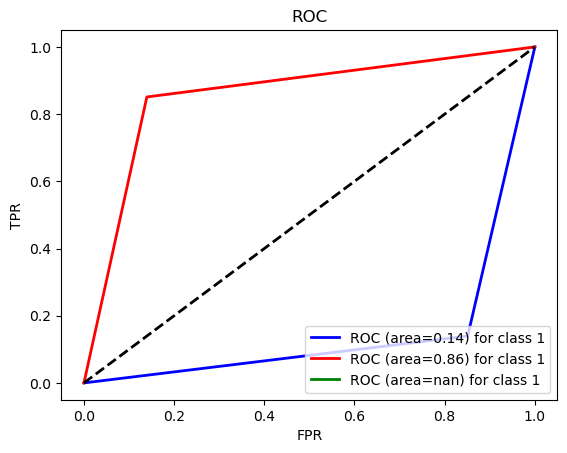

In [112]:
plt.figure()
color=['blue','red','green']
for i, color in zip(range(nc),color):
    plt.plot(fpr[i],tpr[i],color=color, lw=2, label='ROC (area={:.2f}) for class {}'.format(roc_auc[i],df['Class'][i]))
plt.plot([0,1],[0,1],'k--',lw=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()

# TUNNING WITH GRIDSEARCH CV AND RANDOMSEARCH CV

# GRIDSEARCH CV

In [116]:
 param_grid = {
'alpha': [0.1, 1, 10, 100],
'fit_prior': [True, False]
}


In [117]:
bayes = naive_bayes.MultinomialNB()
grid_search = GridSearchCV(bayes, param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 1, 10, 100],
                         'fit_prior': [True, False]})

In [115]:
best_param = grid_search.best_params_
best_nb = naive_bayes.MultinomialNB(alpha = best_param['alpha'], fit_prior = best_param['fit_prior'])
best_nb.fit(x_train, y_train)
y_pred = best_nb.predict(x_test)

In [118]:
print("Best Hyperparameter : ", best_param)

Best Hyperparameter :  {'alpha': 10, 'fit_prior': True}


In [119]:
acc = accuracy_score(y_test, y_pred)
acc

0.8333333333333334

In [120]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82        86
           1       0.83      0.85      0.84        94

    accuracy                           0.83       180
   macro avg       0.83      0.83      0.83       180
weighted avg       0.83      0.83      0.83       180



In [121]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[70, 16],
       [14, 80]], dtype=int64)

# RANDOM SEARCH CV

In [122]:
#Randomized Search 
param_dist = {
    'alpha': uniform(0.1, 2.0),  # Example: Uniform distribution for alpha
    'fit_prior':[True,False]
}

In [123]:
 bayes = naive_bayes.MultinomialNB()

In [124]:
x=scaler.fit_transform(x)

In [125]:
from sklearn.utils.validation import check_non_negative
check_non_negative(x, "MultinomialNB (input x)")

In [126]:
randomized_search = RandomizedSearchCV(bayes, param_distributions=param_dist, n_iter=10, scoring='accuracy', cv=5)
randomized_search.fit(x, y)  # X is your input data, y is your target labels

RandomizedSearchCV(cv=5, estimator=MultinomialNB(),
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000240B190BB10>,
                                        'fit_prior': [True, False]},
                   scoring='accuracy')

In [127]:
best_param = randomized_search.best_params_
print("Best Hyperparameter : ", best_param)


Best Hyperparameter :  {'alpha': 0.20583556115347337, 'fit_prior': True}


In [128]:
best_nb = naive_bayes.MultinomialNB(alpha = best_param['alpha'], fit_prior = best_param['fit_prior'])
best_nb.fit(x_train, y_train)
y_pred = best_nb.predict(x_test)

In [129]:
acc = accuracy_score(y_test, y_pred)
acc

0.8555555555555555

In [130]:
 print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        86
           1       0.87      0.85      0.86        94

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180



In [131]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[74, 12],
       [14, 80]], dtype=int64)